In [261]:
#importing some useful packages
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


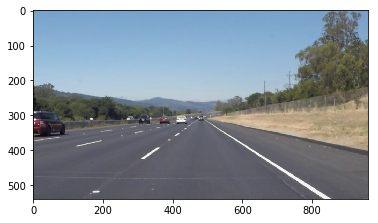

In [302]:
#reading in an image
image = mpimg.imread('test_images/solidWhiteRight.jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
ysize = image.shape[0]
xsize = image.shape[1]

color_select = np.copy(image)
plt.imshow(color_select, cmap="gray")  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

In [266]:
red_threshold = 200
green_threshold = 160
blue_threshold = 160
rgb_threshold = [red_threshold, green_threshold, blue_threshold]
print(image[:,:,0],"\n")
print(image[:,:,0]< rgb_threshold[0],"\n")
# print(image[:,:,1],"\n")
# print(image[:,:,2],"\n")

[[180 142 134 ... 136 146 186]
 [142 143 134 ... 137 142 148]
 [131 133 128 ... 129 136 134]
 ...
 [120  91  83 ...  88  94 120]
 [138 105  89 ...  97 109 139]
 [180 140 117 ... 122 140 179]] 

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]] 



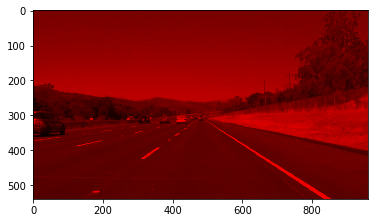

In [300]:
plt.imshow(image[:,:,0])
I_red = np.copy(image)
I_red[:,:,1] = 0
I_red[:,:,2] = 0
plt.imshow(I_red)


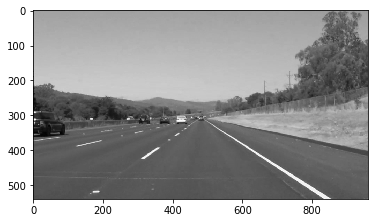

In [305]:
plt.imshow(image[:,:,1], cmap="gray")

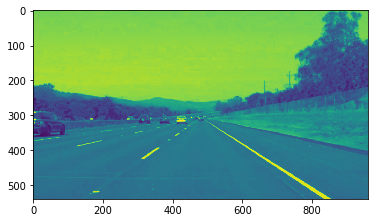

In [275]:
plt.imshow(image[:,:,2])

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


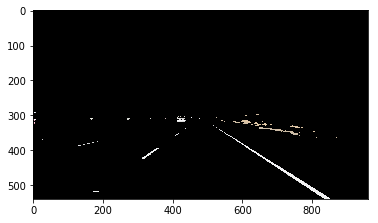

In [264]:
# Identify pixels below the threshold
thresholds = (image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])
print(thresholds)
color_select[thresholds] = [0,0,0]

# Display the image                 
plt.imshow(color_select)
plt.show()

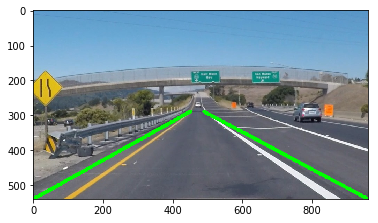

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2


# Read in and grayscale the image
image = mpimg.imread('exit-ramp.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)   
ignore_mask_color = 255   

# This time we are defining a four sided polygon to mask
imshape = image.shape
vertices = np.array([[(0,imshape[0]),(450, 290), (490,290), (imshape[1],imshape[0])]], dtype=np.int32)
cpy = np.copy(image)
cv2.line(cpy, (0,imshape[0]),(450, 290), (0, 255, 0), 10)
cv2.line(cpy, (490,290), (imshape[1],imshape[0]), (0, 255, 0), 10)

plt.imshow(cpy)

# cv2.fillPoly(mask, vertices, ignore_mask_color)
# masked_edges = cv2.bitwise_and(edges, mask)

# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
# rho = 2 # distance resolution in pixels of the Hough grid
# theta = np.pi/180 # angular resolution in radians of the Hough grid
# threshold = 15     # minimum number of votes (intersections in Hough grid cell)
# min_line_length = 40 #minimum number of pixels making up a line
# max_line_gap = 20    # maximum gap in pixels between connectable line segments
# line_image = np.copy(image)*0 # creating a blank to draw lines on

# # Run Hough on edge detected image
# # Output "lines" is an array containing endpoints of detected line segments
# lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
#                             min_line_length, max_line_gap)

# # Iterate over the output "lines" and draw lines on a blank image
# for line in lines:
#     for x1,y1,x2,y2 in line:
#         cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# # Create a "color" binary image to combine with line image
# color_edges = np.dstack((edges, edges, edges)) 

# # Draw the lines on the edge image
# lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
#plt.imshow(lines_edges)

